<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   0       145   233    1        2      150      0      2.3   
1     67    1   3       160   286    0        2      108      1    

/home/aryanmhalsank/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/aryanmhalsank/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


,Model,Accuracy,Sensitivity,Specificity,AUROC,Log_Loss
0,Logistic Regression,0.879121,0.883721,0.875,0.87936,4.356925


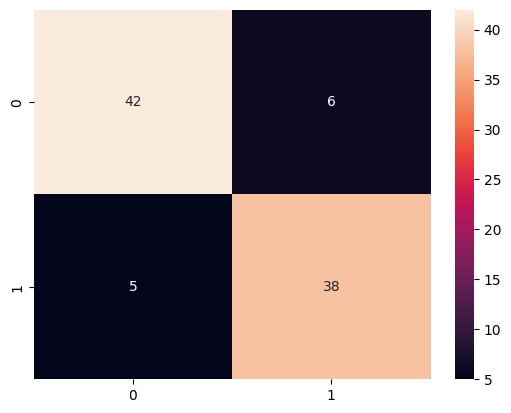

In [1]:
#Logistic Regression with 13 Optimized Features

import numpy as np
import pandas as pd
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, roc_auc_score, roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold

# machine learning algorithms
from sklearn.linear_model import LogisticRegression

heart_data = pd.read_csv("clevland_dataset.csv")

heart_data.head()

heart_data.shape

heart_data.info()

heart_data.isnull().sum()

heart_data.describe()

heart_data['target'].value_counts()


#Splitting the Features and Target

X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

print(X)


# In[31]:


print(Y)


# ## Splitting the Data into Training data & Test Data

# In[32]:


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


# ## Model Training - Logistic Regression

# In[33]:


print(X.shape, X_train.shape, X_test.shape)

model = LogisticRegression()


# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)


# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)


# Building a Predictive System
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')


CM=confusion_matrix(Y_test, X_test_prediction)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
loss_log = log_loss(Y_test, X_test_prediction)
acc= accuracy_score(Y_test, X_test_prediction)
roc=roc_auc_score(Y_test, X_test_prediction)

model_results =pd.DataFrame([['Logistic Regression', acc, sensitivity,specificity, roc, loss_log]],
               columns = ['Model', 'Accuracy', 'Sensitivity','Specificity','AUROC','Log_Loss'])

model_results


In [79]:
#Logistic Regression with 9 Optimized Features

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# machine learning algorithms
from sklearn.linear_model import LogisticRegression

heart_data = pd.read_csv(r"clevland_dataset.csv")
heart_data.head()

heart_data.shape
heart_data.info()

heart_data.isnull().sum()

heart_data.describe()
heart_data['target'].value_counts()

selected_features = ['thal','cp','restecg','ca', 'chol','thalach','exang','oldpeak','slope']
X = heart_data[selected_features]
Y = heart_data['target']

print(X)

print(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print(X.shape, X_train.shape, X_test.shape)

model = LogisticRegression()

# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
     thal  cp  restecg  ca  chol  thalach  exang  oldpeak  slope
0       2   0        2   0   233      150      0      2.3      2
1       1   3        2   3   286      108      1      1.5      1
2       3   3        2  

/home/aryanmhalsank/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [78]:
#Logistic Regression with 7 Optimized Features

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# machine learning algorithms
from sklearn.linear_model import LogisticRegression

heart_data = pd.read_csv(r"clevland_dataset.csv")
heart_data.head()

heart_data.shape
heart_data.info()

heart_data.isnull().sum()

heart_data.describe()
heart_data['target'].value_counts()

selected_features = ['thal','cp','ca', 'chol','thalach','exang','oldpeak']
X = heart_data[selected_features]
Y = heart_data['target']

print(X)

print(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print(X.shape, X_train.shape, X_test.shape)

model = LogisticRegression()

# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
     thal  cp  ca  chol  thalach  exang  oldpeak
0       2   0   0   233      150      0      2.3
1       1   3   3   286      108      1      1.5
2       3   3   2   229      129      1      2.6
3       1   2   0   250

/home/aryanmhalsank/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
